In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
import seaborn as sns
import statsmodels.formula.api as sm

#getting csvs
song_data = pd.read_csv("song_data.csv")
song_info = pd.read_csv("song_info.csv")

In [8]:
#merge 2 files to get a full data set
total_data = pd.merge(song_data, song_info, left_index=True, right_index=True)
total_data.head()
#total_data["song_name_x"].value_counts()

,song_name_x,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_name_y,artist_name,album_names,playlist
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,Boulevard of Broken Dreams,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,In The End,Linkin Park,Hybrid Theory,00s Rock Anthems
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,Seven Nation Army,The White Stripes,Elephant,00s Rock Anthems
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,By The Way,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,How You Remind Me,Nickelback,Silver Side Up,00s Rock Anthems


In [20]:
#basic cleaning of the merged dataframe, removing unnecessary columns
new_data = total_data.drop("album_names",1)
new_data = new_data.drop("playlist",1)
new_data = new_data.drop("song_name_y",1)
new_data = new_data.rename(columns={"song_name_x":"song_name"})
new_data.head()
#removing duplicate values to get 
b = pd.DataFrame(new_data)
b_clean = DataFrame.drop_duplicates(b)
b_clean.sort_values("song_popularity")

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name
17604,Make It Back,0,102560,0.122000,0.750,0.387,0.000000,1,0.0993,-10.123,0,0.4870,143.019,4,0.739,Juice WRLD
14349,Choco / Mog,0,120000,0.572000,0.690,0.731,0.458000,4,0.2420,-5.473,0,0.1870,82.017,4,0.703,Devonwho
4234,Como Deseo Ser Tu Amor,0,227160,0.372000,0.511,0.405,0.000262,9,0.1510,-10.254,1,0.0366,89.841,4,0.459,Los Galos
9394,Down and Out,0,200306,0.001270,0.562,0.698,0.001890,9,0.1460,-5.956,0,0.0439,119.971,4,0.375,The Griswolds
9389,Heartbreaker,0,300663,0.126000,0.373,0.906,0.001230,8,0.1430,-6.750,0,0.0893,110.007,4,0.488,Daniel Wilson
9383,Life's A Bitch - Explicit Album Version,0,209306,0.001190,0.810,0.500,0.000000,2,0.1140,-11.823,1,0.2650,90.036,4,0.336,Nas
9373,Represent - Explicit Album Version,0,252560,0.029700,0.759,0.693,0.000012,11,0.1280,-9.036,1,0.3050,92.771,4,0.698,Nas
9437,Postcard,0,210306,0.116000,0.691,0.739,0.000000,0,0.1560,-5.453,1,0.0301,115.024,4,0.492,Jukebox The Ghost
9362,Killa Cam,0,251453,0.010400,0.670,0.788,0.000000,11,0.4920,-7.426,1,0.2740,80.032,4,0.522,Cam’ron
9339,G Season (feat. Meek Mill),0,237013,0.013700,0.662,0.708,0.000000,1,0.2440,-4.910,1,0.1320,110.602,5,0.446,T.I.


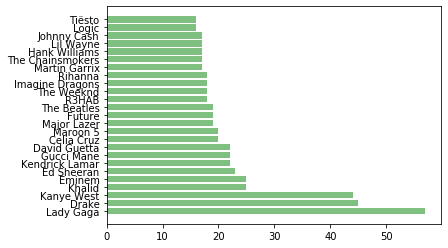

In [10]:
#Plotting top 25 artist by song count
a=b_clean["artist_name"].value_counts()
a=pd.DataFrame(a)
a=a.reset_index()
a=a.rename(columns={"index":"Artist_Name","artist_name":"Song_Count"})
a.head(50)
names = a["Artist_Name"].head(25)
songs = a["Song_Count"].head(25)
plt.barh(names,songs,align='center',alpha=0.5,color='g')
plt.rcParams["figure.figsize"]=[15,15]
plt.show()


In [18]:
#Get average number of songs by an artist and the total amount of artists
a["Artist_Name"].count()
a["Song_Count"].mean()

1.9732945531464834

In [19]:
#get average number of songs by top 100 artist
names = a["Artist_Name"].head(100)
get songs = a["Song_Count"].head(100)
df = pd.DataFrame(names, songs)
df=df.reset_index()
c=df["Song_Count"].mean()
c

15.01

In [21]:
new_data.head()
grouped = new_data.groupby("artist_name").mean()
grouped = grouped.sort_values("song_popularity",ascending = False)
grouped.head()
grouped["song_count"]=b_clean["artist_name"].count
grouped

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_count
artist_name,,,,,,,,,,,,,,,
Dynoro,97.000000,184560.000000,0.176000,0.694000,0.770000,0.000011,6.000000,0.118000,-5.335000,1.000000,0.149000,125.905000,4.000000,0.163000,<bound method Series.count of 0 ...
benny blanco,95.727273,173726.727273,0.569182,0.571727,0.662818,0.000000,6.272727,0.121091,-7.502000,0.090909,0.294700,89.447364,4.000000,0.368909,<bound method Series.count of 0 ...
Nio Garcia,94.000000,417920.000000,0.542000,0.903000,0.675000,0.000013,11.000000,0.059500,-3.445000,0.000000,0.214000,96.507000,4.000000,0.442000,<bound method Series.count of 0 ...
6ix9ine,92.177778,177518.511111,0.113324,0.792778,0.587711,0.000000,4.111111,0.144213,-6.366667,0.955556,0.326800,130.050756,4.000000,0.499000,<bound method Series.count of 0 ...
Bad Bunny,91.500000,210108.318182,0.090336,0.820409,0.573364,0.000589,5.545455,0.104032,-6.013000,0.090909,0.076464,99.788682,4.000000,0.260727,<bound method Series.count of 0 ...
Silk City,90.611111,232821.111111,0.022078,0.597778,0.695111,0.005209,0.388889,0.327333,-6.393000,1.000000,0.048944,118.641389,4.000000,0.506222,<bound method Series.count of 0 ...
Brytiago,90.000000,187213.000000,0.614000,0.845000,0.663000,0.000000,10.000000,0.114000,-5.233000,0.000000,0.270000,94.215000,4.000000,0.508000,<bound method Series.count of 0 ...
Dennis Lloyd,90.000000,156600.000000,0.156000,0.592000,0.691000,0.000010,3.000000,0.418000,-8.354000,1.000000,0.196000,99.976000,4.000000,0.079600,<bound method Series.count of 0 ...
Ava Max,89.000000,187436.000000,0.069100,0.719000,0.704000,0.000000,1.000000,0.166000,-4.724000,1.000000,0.047600,133.002000,4.000000,0.628000,<bound method Series.count of 0 ...


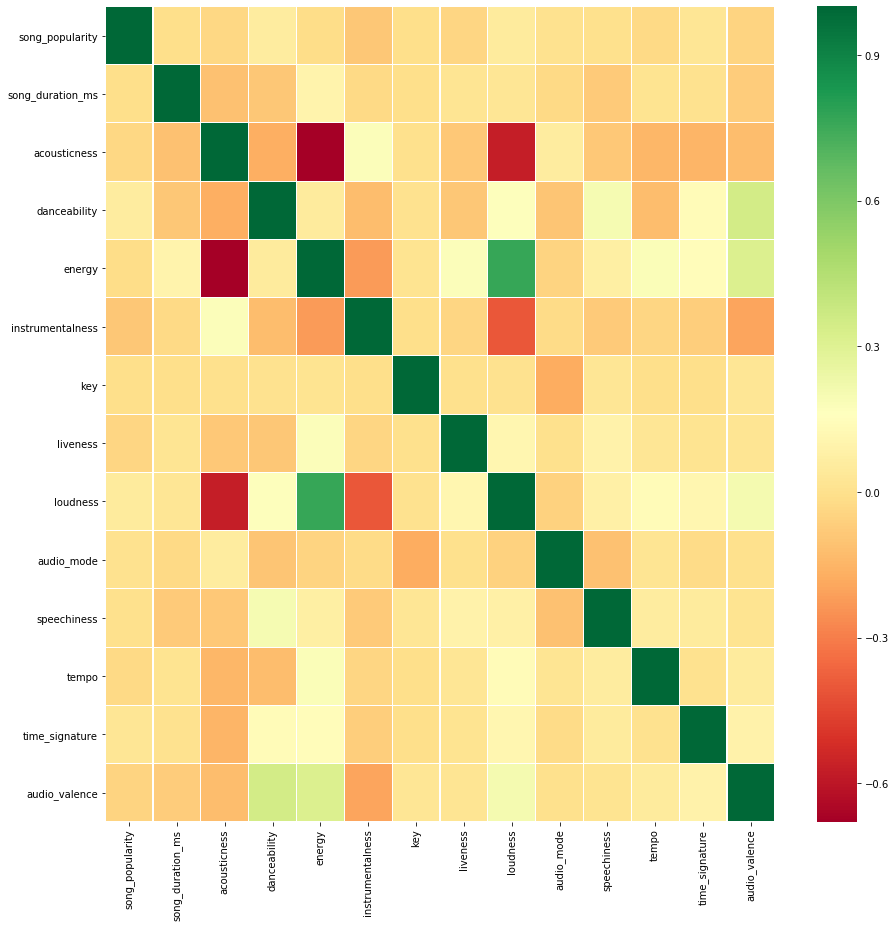

In [22]:
#Creating a correlation matrix to see if there're any obvious correlations
corr = b_clean.corr()
ax = sns.heatmap(corr,  linewidth=0.1, cmap="RdYlGn")

In [23]:
#Getting Rsq and coefficients
result = sm.ols(formula="song_popularity ~ song_duration_ms + acousticness + danceability + energy + instrumentalness + key + liveness + loudness + audio_mode + speechiness + tempo + time_signature + audio_valence",data=b_clean).fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:        song_popularity   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     27.48
Date:                Sat, 14 Sep 2019   Prob (F-statistic):           1.65e-67
Time:                        11:54:49   Log-Likelihood:                -65997.
No. Observations:               14926   AIC:                         1.320e+05
Df Residuals:                   14912   BIC:                         1.321e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           56.9450      2.790  

Text(0, 0.5, 'Energy')

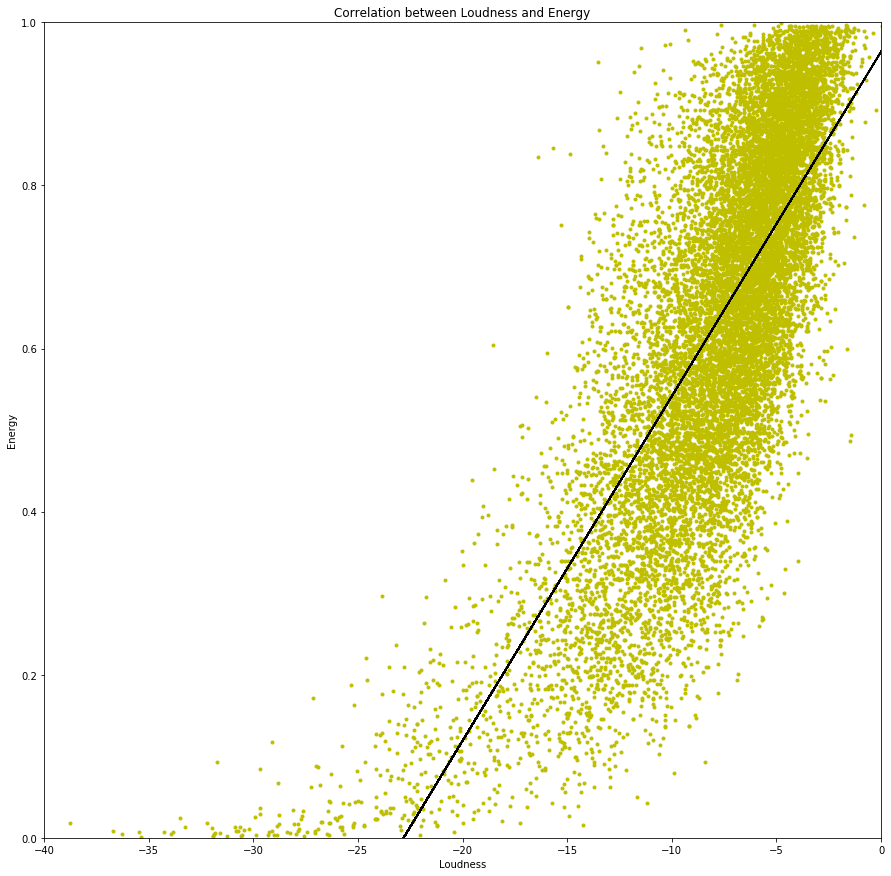

In [24]:
#energy and loudness seem to have 0.76 correlation above
#get correlations between LOUDNESS and ENERGY
x = b_clean["loudness"].values
y = b_clean["energy"].values

fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit)

plt.plot(x,y,"y.",x,fit_fn(x),'--k')
plt.xlim(-40,0)
plt.ylim(0,1)

plt.title("Correlation between Loudness and Energy")
plt.xlabel("Loudness")
plt.ylabel("Energy")

Text(0, 0.5, 'Energy')

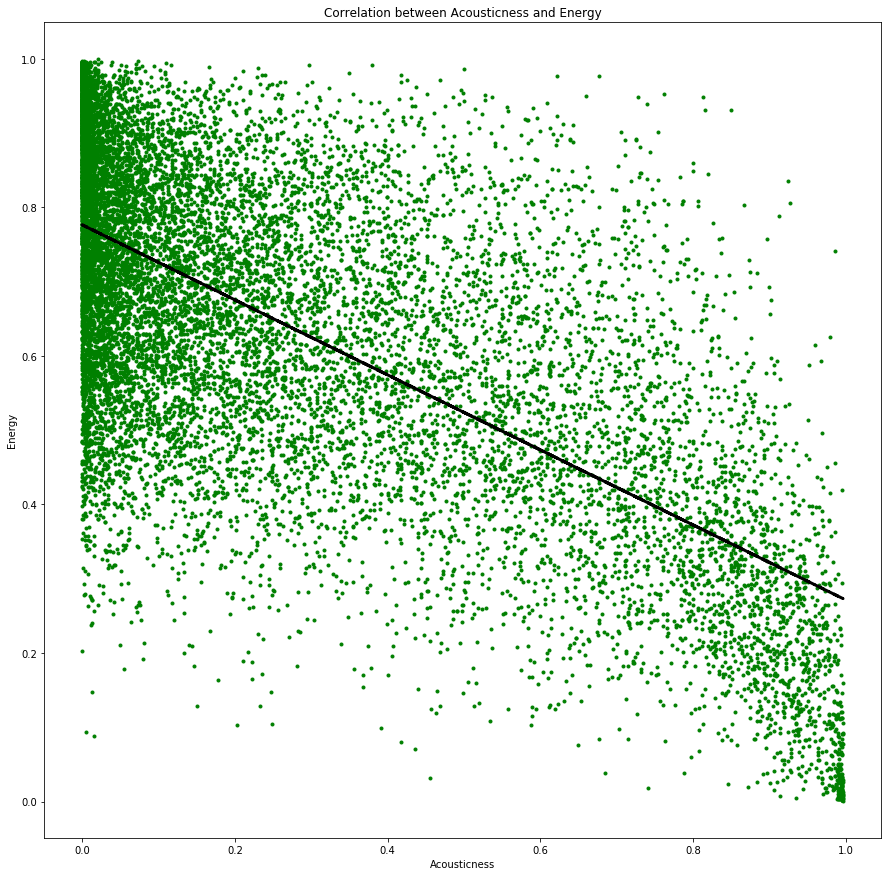

In [25]:
#correlations between ENERGY and ACOUSTICNESS
x = b_clean["acousticness"].values
y = b_clean["energy"].values

fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit)

plt.plot(x,y,"g.",x,fit_fn(x),'--k', linewidth=3)
plt.title("Correlation between Acousticness and Energy")
plt.xlabel("Acousticness")
plt.ylabel("Energy")

Text(0, 0.5, 'Loudness')

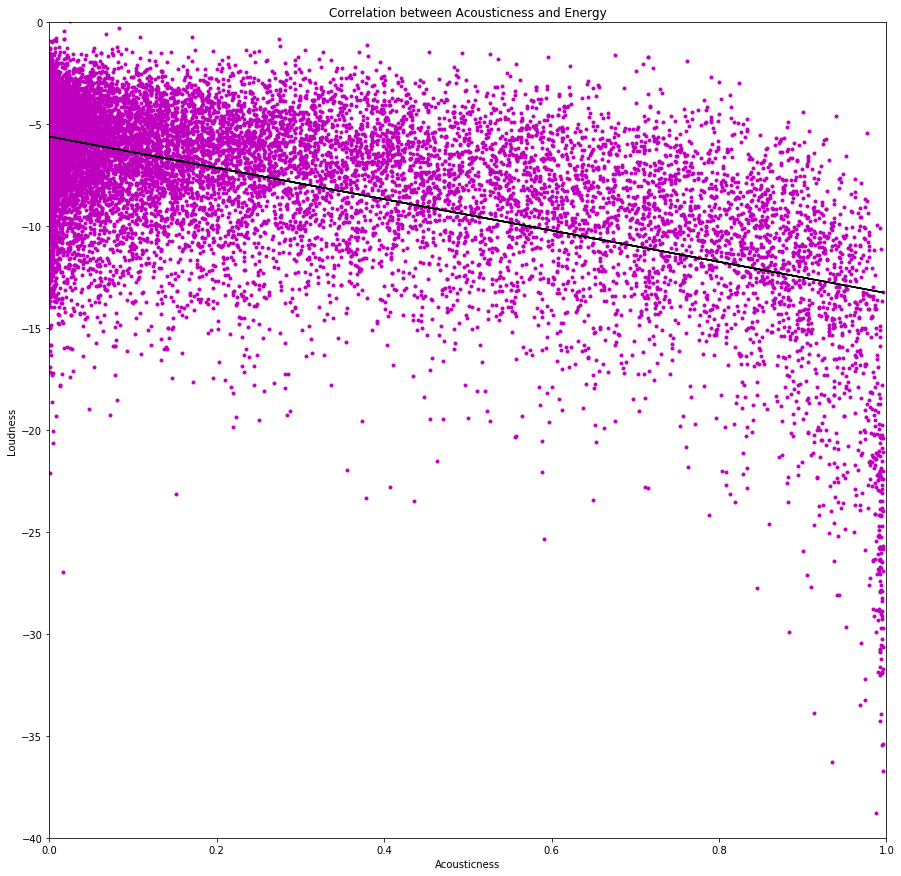

In [26]:
#correlations between LOUDNESS and ACOUSTICNESS
x = b_clean["acousticness"].values
y = b_clean["loudness"].values

fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit)

plt.plot(x,y,"m.",x,fit_fn(x),'-k')
plt.xlim(0,1)
plt.ylim(-40,0)

plt.title("Correlation between Acousticness and Energy")
plt.xlabel("Acousticness")
plt.ylabel("Loudness")